In [1]:
from after_isosbestic import afterisosbestic
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
def read_csv_data(loc):
    base_dir = os.getcwd().split('Git Kinetics')[0]+'Git Kinetics'

    # Combine the base directory with the passed location
    full_path = os.path.join(base_dir, loc)
    os.chdir(full_path.replace('\\','/'))

    data = []
    for dirpath, dirnames, filenames in os.walk(os.getcwd()):
        for file in filenames:
            if file.endswith("csv") and not file.startswith("all"): # 'all' file contains all the data, so skipping them to not read the data twice
                spectrum = pd.read_csv(f"{dirpath}/{file}", header=None, delimiter=";").replace({',': '.'}, regex=True).astype(float)
                data.append(np.array(spectrum))
                
    absorptions = data[0][:,0].reshape(-1,1)
    for i in range(len(data)):
        absorptions = np.concatenate((absorptions, data[i][:,1].reshape(-1,1)), axis=1)
        
    return absorptions

# Study of the Photodegradation of Newly Synthesized Photoinitiators

-  During the irradiation of the samples, the formation of new peaks was observed, with preservation at initial times of the isosbestic points resulting from the peaks of the decaying reactant and the products formed.

In [3]:
absorptions = read_csv_data('Experimental Data/Bzth CEx/0.43')

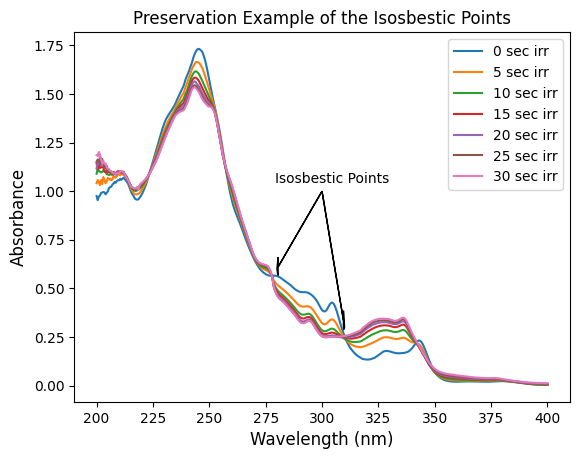

In [4]:
x, y = 300, 1.0
dx, dy = 10, -0.7
dx1, dy1 = -20, -0.4

label = ['0 sec irr', '5 sec irr', '10 sec irr', '15 sec irr', '20 sec irr', '25 sec irr', '30 sec irr']

plt.title('Preservation Example of the Isosbestic Points')
plt.plot(absorptions[:, 0], absorptions[:, 1:], label=label)
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)

plt.arrow(x, y, dx, dy, head_width=0.1, head_length=0.5, length_includes_head=True)
plt.arrow(x, y, dx1, dy1, head_width=0.1, head_length=0.5, length_includes_head=True)

plt.text(x+30, y+0.03, 'Isosbestic Points', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.legend()
plt.show()

- Given those isosbestic Points it is known that the reaction is of Type: A $->$ B where B can be one or more products
- Knowing that the photodegradation mechanism of the photoinitiators synthesizes is of the form R$_1$ $-$ R$_2$ $->$ R$_1$* $+$ R$_2$*, where R$_1$* and R$_2$* two active radicals and R$_1$ $-$ R$_2$ our initial photoinitiator, we can assume that the final products that are given by the rapid reaction of those radicals, follow the same kinetic profile of the degradation of the photoinitiator (same determitating step of both degradation of the reagend and formation of the products)

### Reagent

- The first order kinetics equation for a degration is: $C = C_0 \cdot \exp(-k \cdot t) \tag{1}$
- The Absorbance (UV spectrums given above) of the this same molecule: $ A = \varepsilon \cdot b \cdot C \tag{2} $
- Lenght of the UV cell $b = 1$, thus: $\frac{A}{\varepsilon} = \frac{A_0}{\varepsilon} \cdot exp^{-k \cdot t} \tag{3} $
- Multiplying with absorbance molecular coefficient $ε$: $Α = Α_0 \cdot \exp(-k \cdot t) \tag{4}$
- Since this equation is for the degradation of a reagent: $ A_{\text{reagent}} = A_{0,\text{reagent}} \cdot e^{-k \cdot t} \tag{5} $

### Products

- Likewise, the first order kinetics equation for a formation is: $ C = C_0 \cdot (1 - e^{-k \cdot t}) \tag{6} $
- Substituting C with A like before: $ A = A_0 \cdot (1 - e^{-k \cdot t})  \tag{7} $
- In the case of multiple products: $ A_{\text{products}} = A_{0,1} \cdot (1 - e^{-k \cdot t}) + A_{0,2} \cdot (1 - e^{-k \cdot t}) + \dots + A_{0,n} \cdot (1 - e^{-k \cdot t}) \tag{8} $
- Which collapse to the following : $ A_{\text{products}} = (A_{0,1} + A_{0,2} + \dots + A_{0,n}) \cdot (1 - e^{-k \cdot t}) \tag{9} $
- Thus: $ A_{\text{products}} = A_{0,\text{products}} \cdot (1 - e^{-k \cdot t}) \tag{10} $

where $A_{0,\text{products}}$ is the max absorption of all the products combined at the end of the reaction 

### Total Behavior of the Irridation

- With the sum of the equations $(5)$ and $(10)$ we receive the following equiation: $ A_{\text{solution}} = A_{0,\text{reagent}} \cdot e^{-k \cdot t} + A_{0,\text{product}} \cdot (1 - e^{-k \cdot t}) \tag{11} $

which sould be able to predict the spectrums for those times that the isosbestic point is stable. 
- In order to predict later times (after the isosbestic point) the following equation was used:
$ A_{\text{solution}} = A_{0,\text{reagent}} \cdot e^{-k \cdot t} + A_{0,\text{product}} \cdot (1 - e^{-k \cdot t})e^{-k_1 \cdot t} \tag{12} $

Equation $(12)$ simplifies to Equation $(11)$ when $k_1$ = 0
Since there is no information about the mechanism of the degradation of the products, this approach was not used for much later times after the shift of the isosbestic.
* $A_{0,\text{reagent}}$ is the spectrum at time 0 sec irridation, and it is not optimized

### Example Usage on the experiment data of the degradation of the three new photoinitiators

#### Bzox-SCH$_2$-Xn in Cyclohexane

In [5]:
absorptions = read_csv_data('Experimental Data/Bzox Cex/0.64')
time = np.array([0,5,10,15,20,25,30])

In [6]:
bzox_06_cex = afterisosbestic(time, absorptions)

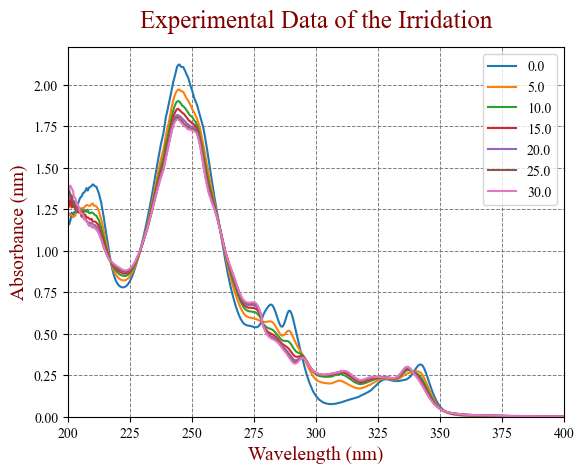

In [7]:
bzox_06_cex.plot_data() # Experimenta Data

In [8]:
bzox_06_cex.fit() # Fit of equation (12)

Epoch = 0, MSE = 18.781886826520644, Ridge Loss = 0.0, Total Loss = 18.781886826520644
Epoch = 1000, MSE = 0.16202485914242667, Ridge Loss = 0.0, Total Loss = 0.16202485914242667
Epoch = 2000, MSE = 0.13827320564153994, Ridge Loss = 0.0, Total Loss = 0.13827320564153994
Epoch = 3000, MSE = 0.14146027383371565, Ridge Loss = 0.0, Total Loss = 0.14146027383371565
Epoch = 4000, MSE = 0.14298796759963506, Ridge Loss = 0.0, Total Loss = 0.14298796759963506


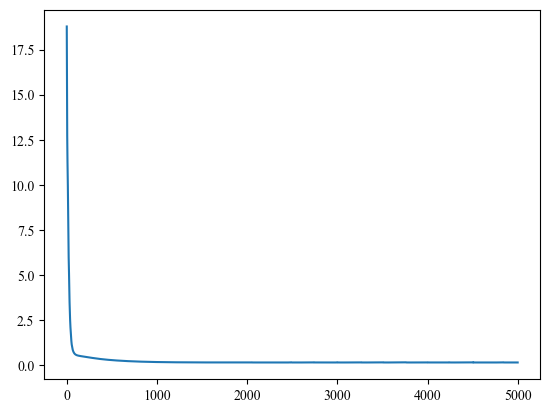

In [9]:
bzox_06_cex.plot_loss() # Minimization of the Loss 

In [10]:
print(bzox_06_cex)

First order product Model:
	k = 0.12252
	k1 = 0.00017
Metrics:
	R_Square: 0.99985
	Adjusted R_Square: 0.99985


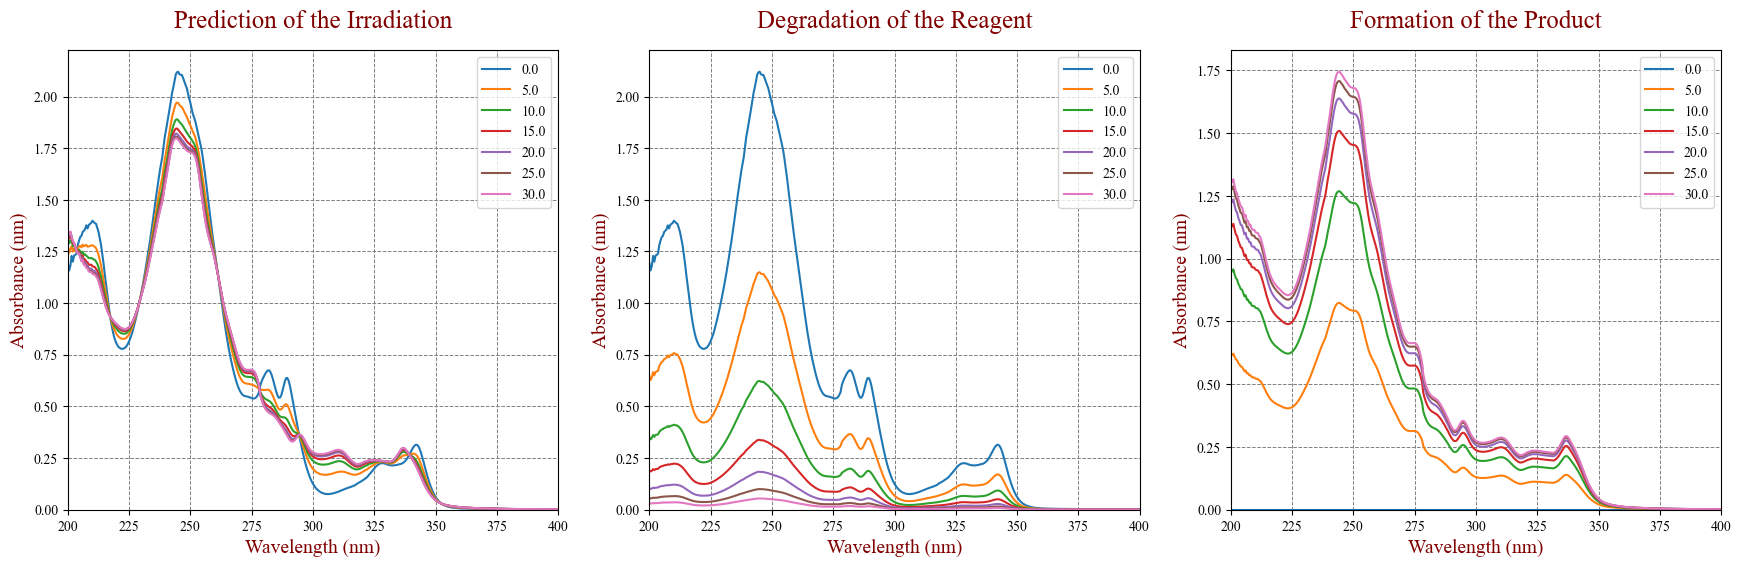

In [11]:
bzox_06_cex.plot_all() 
# prediction of the irridiation (left, Eq.12), prediction of the degreadation of the reagent(center, Eq.5), prediction of the formation of the product(s) (right, Eq.10*)
# *Eq.10: including 'exp(-k1*t)' term

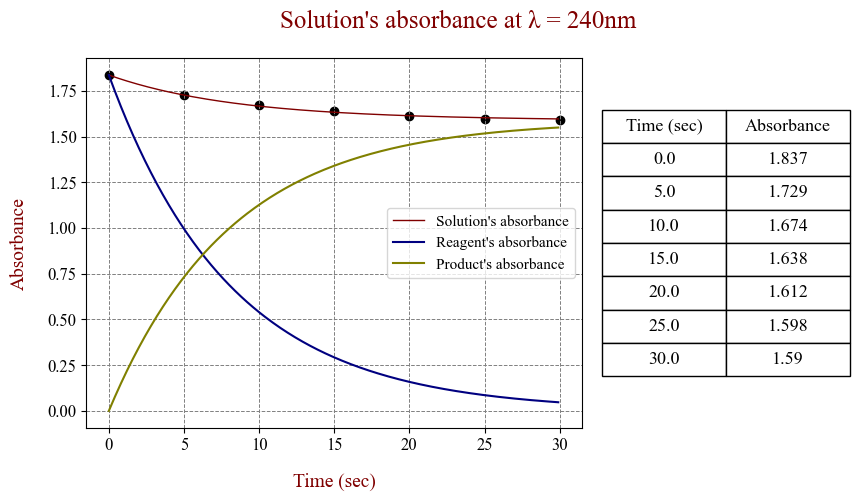

In [12]:
bzox_06_cex.plot_model(240) # Fit in a peak that the products absorb less than the reaggent

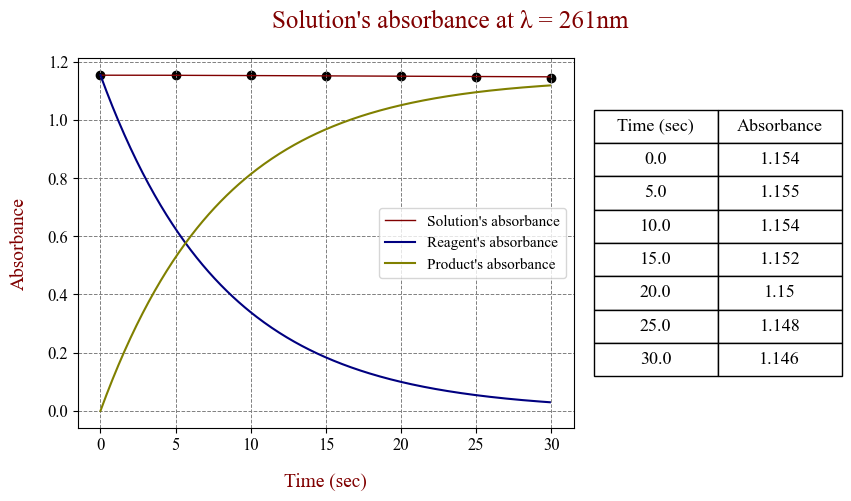

In [13]:
bzox_06_cex.plot_model(261) # Fit in isosbestic point

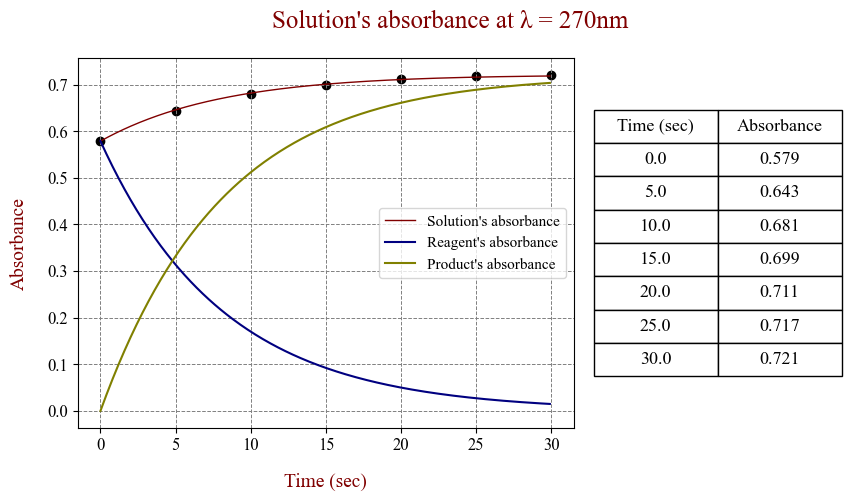

In [14]:
bzox_06_cex.plot_model(270) # Fit in a peak that the reaggents absorb less than the reaggents products

#### Bzth-SCH$_2$-Xn in Cyclohexane

In [15]:
absorptions = read_csv_data('Experimental Data/Bzth Cex/0.65')
time = np.array([0,5,10,15,20,25,30])

In [16]:
absorptions_train = np.concatenate((absorptions[:,:4], absorptions[:,5::2]), axis=1)
absorptions_test = np.concatenate((absorptions[:,0].reshape(-1,1), absorptions[:,4::2]), axis=1)

In [17]:
time

array([ 0,  5, 10, 15, 20, 25, 30])

In [18]:
time[:3]

array([ 0,  5, 10])

In [19]:
time[3::2]

array([15, 25])

In [20]:
time_train = np.concatenate((time[:3], time[4::2]))
time_test = time[3::2]

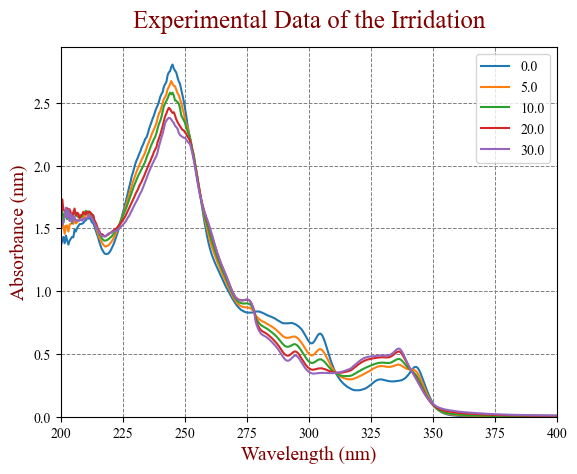

In [21]:
bzth_06_cex = afterisosbestic(time_train, absorptions_train)
bzth_06_cex.plot_data() # Experimenta Data

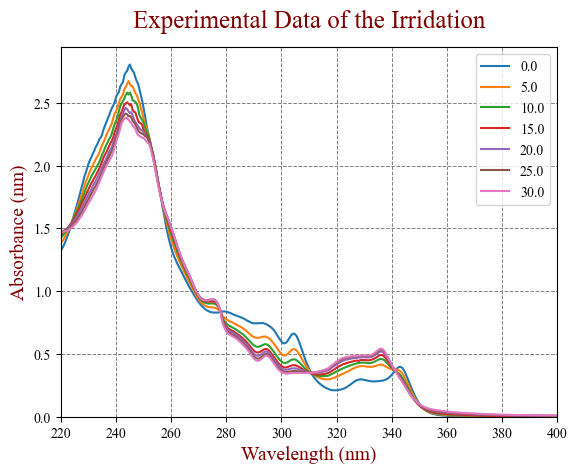

In [22]:
bzth_06_cex = afterisosbestic(time, absorptions[40:,:]) # crop out the noise
bzth_06_cex.plot_data() # Experimenta Data

In [23]:
absorptions_test = absorptions_test[40:,:]

0
Epoch = 0, MSE = 26.412442215277807, Ridge Loss = 0.0, Total Loss = 26.412442215277807
Epoch = 1000, MSE = 0.10392899767274338, Ridge Loss = 0.0, Total Loss = 0.10392899767274338
Epoch = 2000, MSE = 0.08963608046458853, Ridge Loss = 0.0, Total Loss = 0.08963608046458853
Epoch = 3000, MSE = 0.09014683487862235, Ridge Loss = 0.0, Total Loss = 0.09014683487862235
Epoch = 4000, MSE = 0.08959987253322377, Ridge Loss = 0.0, Total Loss = 0.08959987253322377


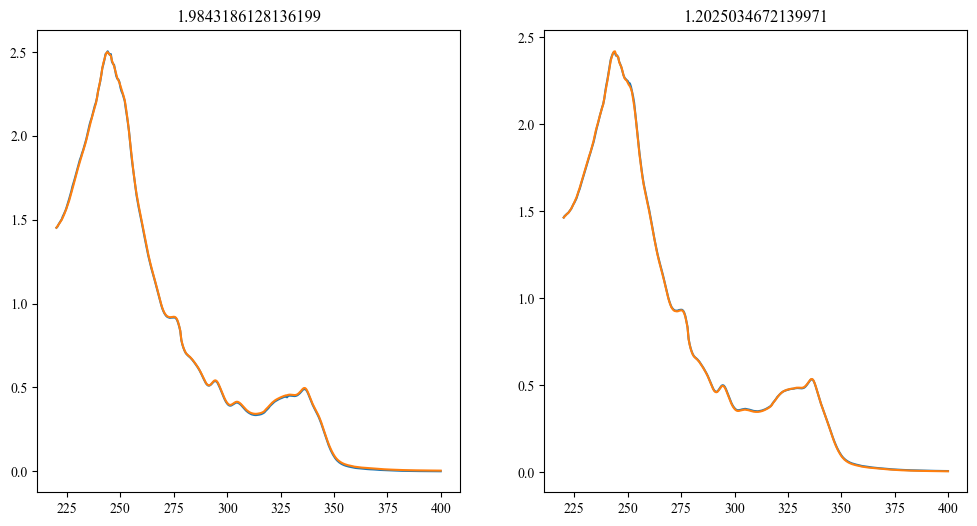

1
Epoch = 0, MSE = 26.412442215277807, Ridge Loss = 9.999999747378752e-05, Total Loss = 26.41254221527528
Epoch = 1000, MSE = 0.10494498959491608, Ridge Loss = 0.005941678304225206, Total Loss = 0.11088666789914128
Epoch = 2000, MSE = 0.08979272713228967, Ridge Loss = 0.007588544860482216, Total Loss = 0.09738127199277188
Epoch = 3000, MSE = 0.09195818186384455, Ridge Loss = 0.007674939930438995, Total Loss = 0.09963312179428355
Epoch = 4000, MSE = 0.08967201364315505, Ridge Loss = 0.007678833324462175, Total Loss = 0.09735084696761723


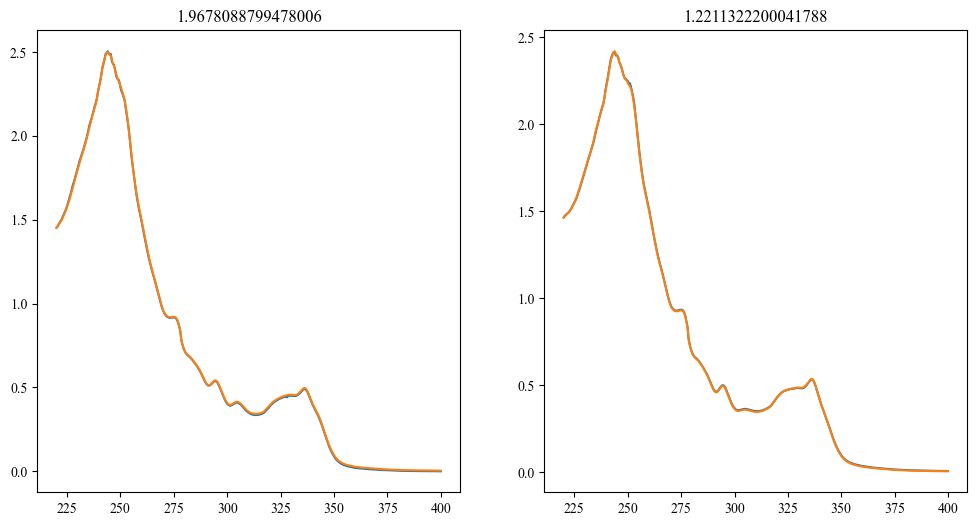

10
Epoch = 0, MSE = 26.412442215277807, Ridge Loss = 0.0009999999310821295, Total Loss = 26.41344221520889
Epoch = 1000, MSE = 0.11518826728271446, Ridge Loss = 0.05455823987722397, Total Loss = 0.16974650715993844
Epoch = 2000, MSE = 0.09557821948566608, Ridge Loss = 0.06587931513786316, Total Loss = 0.16145753462352924
Epoch = 3000, MSE = 0.09521151439530152, Ridge Loss = 0.06623852998018265, Total Loss = 0.16145004437548416
Epoch = 4000, MSE = 0.09519893804184079, Ridge Loss = 0.06625106185674667, Total Loss = 0.16144999989858747


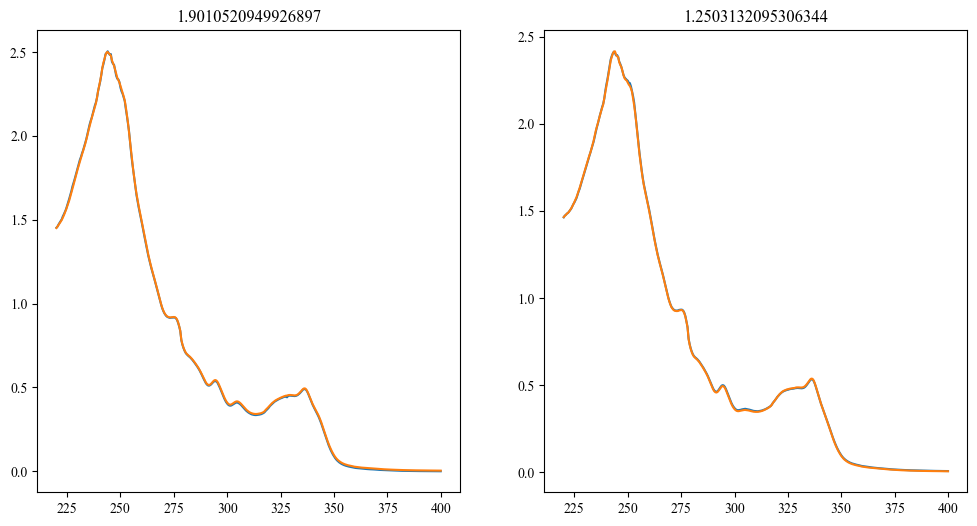

100
Epoch = 0, MSE = 26.412442215277807, Ridge Loss = 0.009999999776482582, Total Loss = 26.42244221505429
Epoch = 1000, MSE = 0.2561111846910157, Ridge Loss = 0.2883633077144623, Total Loss = 0.544474492405478
Epoch = 2000, MSE = 0.2555652602146341, Ridge Loss = 0.28890207409858704, Total Loss = 0.5444673343132211
Epoch = 3000, MSE = 0.2569002105718169, Ridge Loss = 0.28872063755989075, Total Loss = 0.5456208481317076
Epoch = 4000, MSE = 0.25579207286311845, Ridge Loss = 0.2886817455291748, Total Loss = 0.5444738183922933


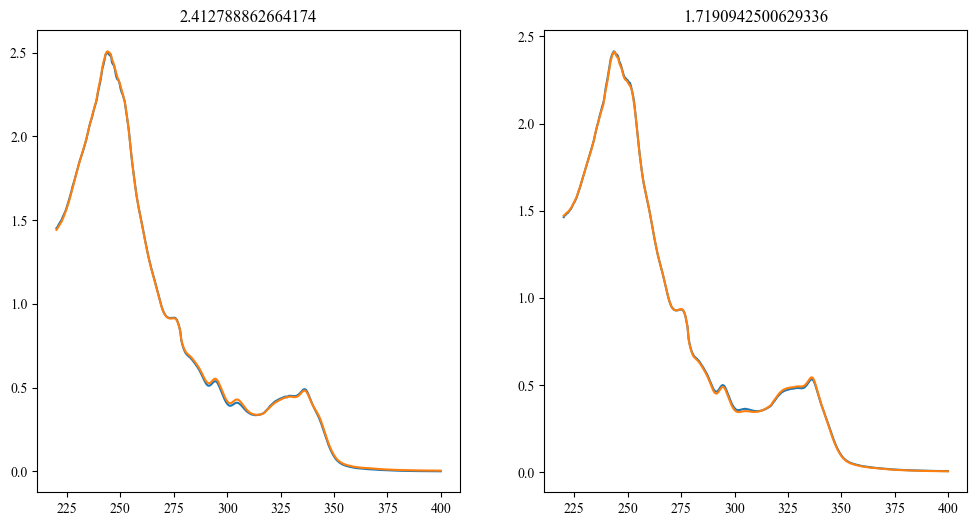

In [25]:
# Testing which lamda value can better predict the spectrums, not seen by the learning algorithm

test_loss_dict = {}

for lamda in [0, 1, 10, 100]:
    print(lamda)
    bzth_06_cex = afterisosbestic(time, absorptions[40:,:])
    
    bzth_06_cex.fit(lambda_k=lamda)
    preds = bzth_06_cex.forward(torch.tensor(time_test)).detach().numpy()
    
    loss = np.sum(preds - absorptions_test[:, 1:])
    
    test_loss_dict[lamda] = [loss, bzth_06_cex.k]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    ax[0].plot(absorptions_test[:, 0], absorptions_test[:, 1])
    ax[0].plot(absorptions_test[:, 0], preds[:, 0])
    ax[1].plot(absorptions_test[:, 0], absorptions_test[:, 2])
    ax[1].plot(absorptions_test[:, 0], preds[:, 1])

    ax[0].title.set_text(np.sum(np.abs(absorptions_test[:, 1]-preds[:, 0])))
    ax[1].title.set_text(np.sum(np.abs(absorptions_test[:, 2]-preds[:, 1])))
    
    plt.show()

In [28]:
bzth_06_cex.R_Square()

0.9998279660672701

In [29]:
test_loss_dict

{0: [0.6047420087931641, tensor(0.0884, requires_grad=True)],
 1: [0.5374546704017369, tensor(0.0876, requires_grad=True)],
 10: [0.5588685423286465, tensor(0.0814, requires_grad=True)],
 100: [0.6886015256862739, tensor(0.0537, requires_grad=True)]}

In [30]:
bzth_06_cex.fit() # Fit of equation (12)

Epoch = 0, MSE = 0.25558842922421776, Ridge Loss = 0.0, Total Loss = 0.25558842922421776
Epoch = 1000, MSE = 0.08959987223412627, Ridge Loss = 0.0, Total Loss = 0.08959987223412627
Epoch = 2000, MSE = 0.09023051111253819, Ridge Loss = 0.0, Total Loss = 0.09023051111253819
Epoch = 3000, MSE = 0.08959984324478065, Ridge Loss = 0.0, Total Loss = 0.08959984324478065
Epoch = 4000, MSE = 0.08959991198448455, Ridge Loss = 0.0, Total Loss = 0.08959991198448455


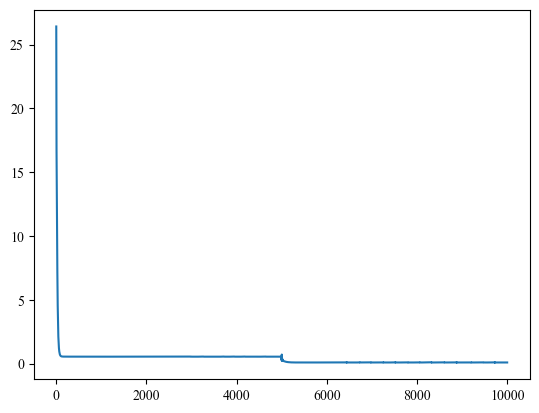

In [31]:
bzth_06_cex.plot_loss() # Minimization of the Loss 

print(bzth_06_cex)

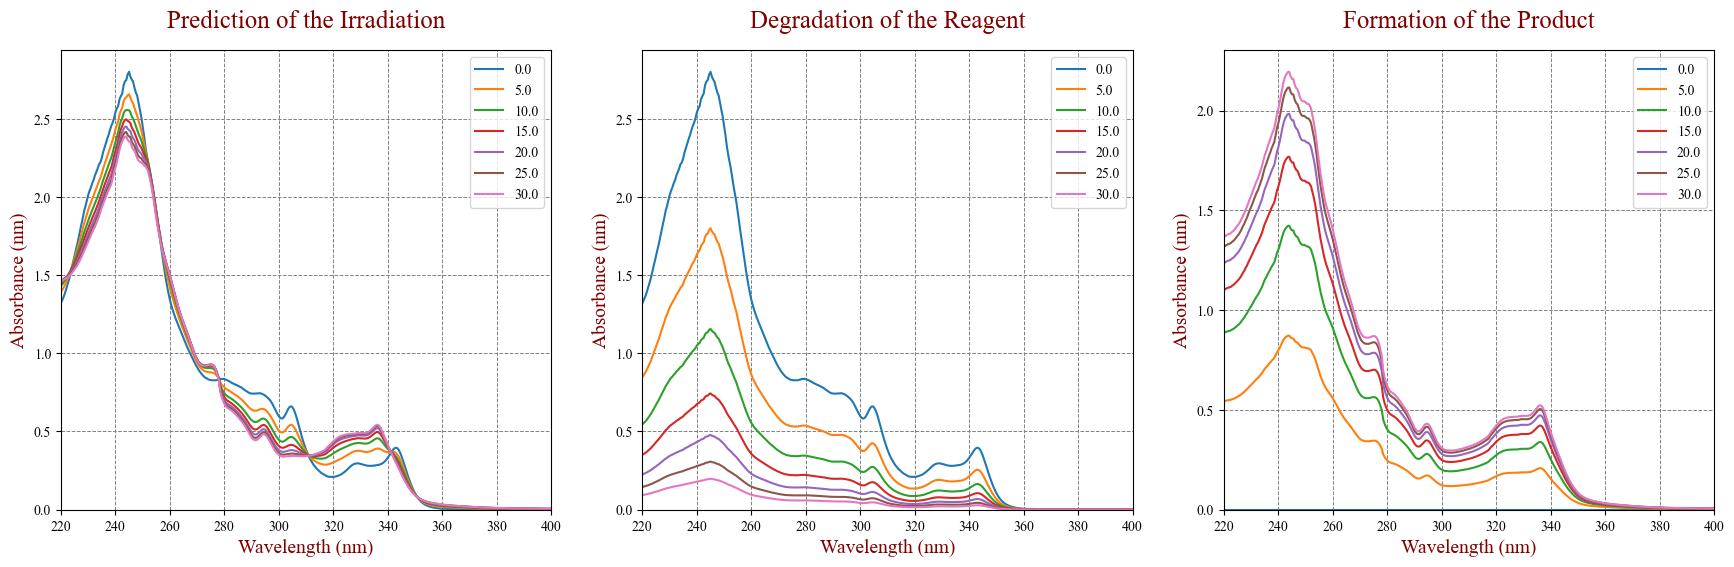

In [32]:
bzth_06_cex.plot_all() # all of the predictions

#### Np-SCH$_2$-Xn in Cyclohexane

In [33]:
absorptions = read_csv_data('Experimental Data/Napth Cex/1.69')
time = np.array([0,10,20,30,40,60,80])

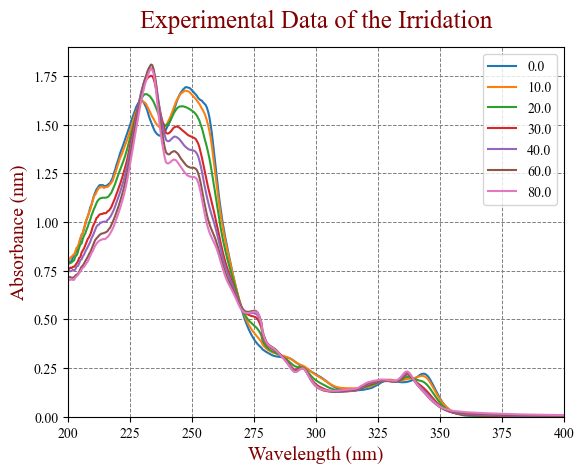

In [34]:
np_17_cex = afterisosbestic(time, absorptions)
np_17_cex.plot_data() # Experimenta Data

In [35]:
np_17_cex.fit() # Fit of equation (12)

Epoch = 0, MSE = 7.833690330359498, Ridge Loss = 0.0, Total Loss = 7.833690330359498
Epoch = 1000, MSE = 0.5773188582967448, Ridge Loss = 0.0, Total Loss = 0.5773188582967448
Epoch = 2000, MSE = 0.5773009818291842, Ridge Loss = 0.0, Total Loss = 0.5773009818291842
Epoch = 3000, MSE = 0.5797873103815567, Ridge Loss = 0.0, Total Loss = 0.5797873103815567
Epoch = 4000, MSE = 0.579005008253322, Ridge Loss = 0.0, Total Loss = 0.579005008253322


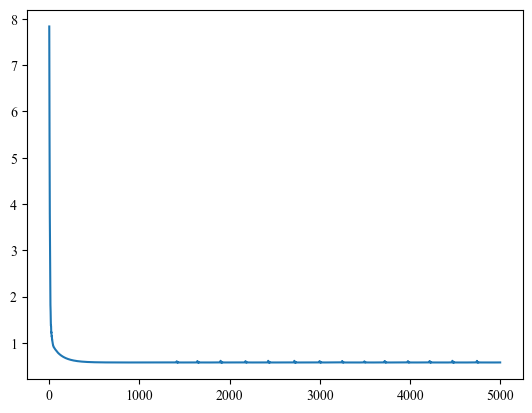

In [36]:
np_17_cex.plot_loss() # Minimization of the Loss 

In [37]:
print(np_17_cex)

First order product Model:
	k = 0.02054
	k1 = 0.00109
Metrics:
	R_Square: 0.99934
	Adjusted R_Square: 0.99934


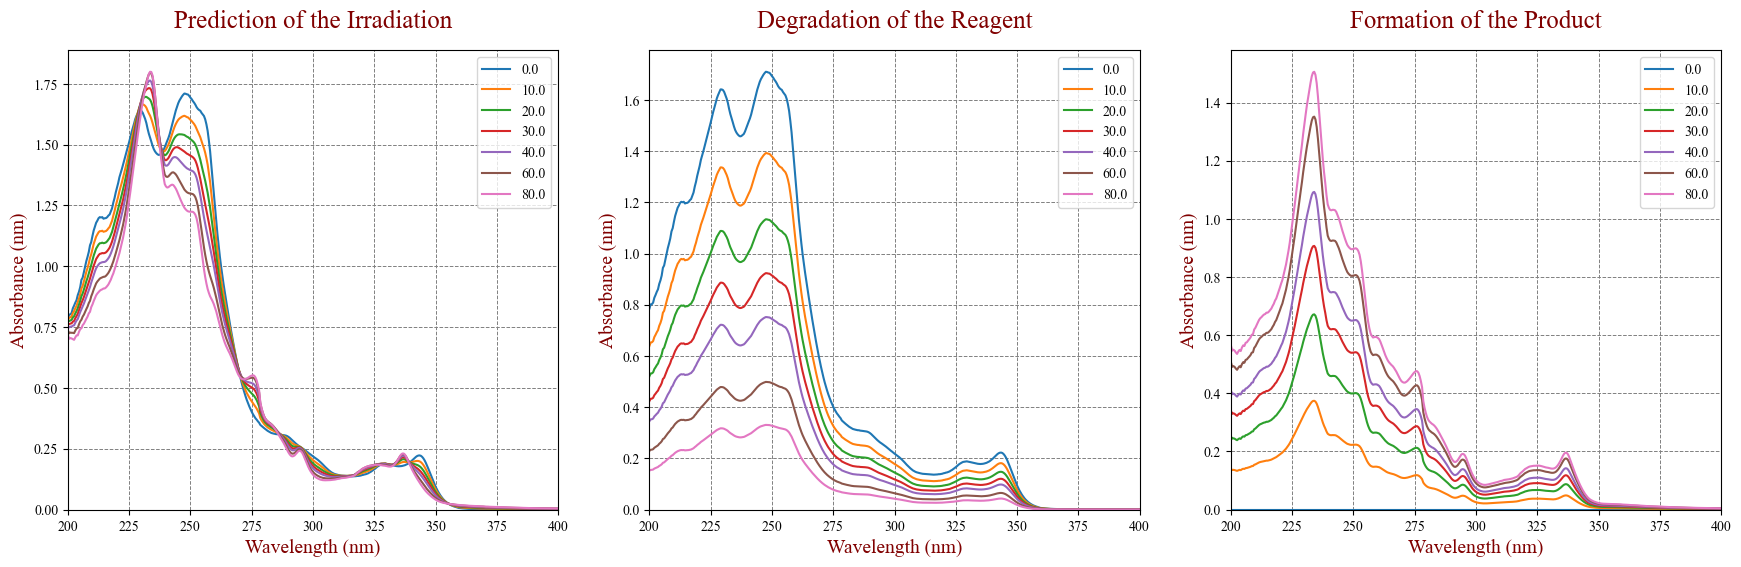

In [38]:
np_17_cex.plot_all() # all of the predictions